<h1> NetCDF and Plotting in Python </h1>

<h2> Example data </h2>

In this example, I'm going to analyse two separate files for:  

    1. Sea water salinity, 3D full time series, annual;
    2. Sea ice area fraction, monthly

In [2]:
from netCDF4 import Dataset 

salinity = Dataset('so_ann_CCSM3_abrupt8x_1450_g025.nc', 'r')
sea_ice = Dataset('sic_ann_FAMOUS_abrupt2x_3000_g025.nc', 'r')

<h2> Metadata </h2>

<b> NOTE:</b> A more complete summary can be obtained by entering the following from the command line: 

        ncdump -h filepath.nc

In [3]:
print("SALINITY SUMMARY", '\n', salinity)

SALINITY SUMMARY 
 <class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    CDI: Climate Data Interface version 1.7.0 (http://mpimet.mpg.de/cdi)
    Conventions: CF-1.4
    history: Sun Jul 17 20:47:18 2016: cdo remapbil,mygrid so_CCSM3_abrupt8x_1450.nc so_CCSM3_abrupt8x_1450_g025.nc
    CDO: Climate Data Operators version 1.7.0 (http://mpimet.mpg.de/cdo)
    dimensions(sizes): lon(144), lat(72), z_t(25), time(1450)
    variables(dimensions): float64 lon(lon), float64 lat(lat), float32 z_t(z_t), float64 time(time), float32 so(time,z_t,lat,lon), float32 TAREA(lat,lon)
    groups: 


In [4]:
print("SEA_ICE", '\n', sea_ice)

SEA_ICE 
 <class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    CDI: Climate Data Interface version 1.7.2 (http://mpimet.mpg.de/cdi)
    Conventions: CF-1.4
    history: Thu Feb 16 20:26:05 2017: cdo remapbil,mygrid sic_FAMOUS_abrupt2x_3000.nc sic_FAMOUS_abrupt2x_3000_g025.nc
Thu Feb 16 19:52:09 2017: cdo chname,sea_ice_area_fraction,sic sic_FAMOUS_abrupt2x_3000.nc sic_FAMOUS_abrupt2x_3000_new.nc
    source: Data from Met Office Unified Model run XJVJO
    CDO: Climate Data Operators version 1.7.2 (http://mpimet.mpg.de/cdo)
    dimensions(sizes): lon(144), lat(72), time(3000), bnds(2)
    variables(dimensions): >f8 lon(lon), >f8 lat(lat), >f8 time(time), >f8 time_bnds(time,bnds), >f4 sic(time,lat,lon)
    groups: 


In [9]:
def print_dimensions(data):
    for d_name, d in data.dimensions.items():
        print(d)

print_dimensions(salinity)

<class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 144
<class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 72
<class 'netCDF4._netCDF4.Dimension'>: name = 'z_t', size = 25
<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 1450


In [10]:
print_dimensions(sea_ice)

<class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 144
<class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 72
<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 3000
<class 'netCDF4._netCDF4.Dimension'>: name = 'bnds', size = 2


In [26]:
# Salinity Variables 
sal_lat = salinity.variables['lat']
sal_lon = salinity.variables['lon']
so = salinity.variables['so']

In [33]:
# Sea_Ice Variables 
sic_lat = sea_ice.variables['lat']
sic_lon = sea_ice.variables['lon']
sic = sea_ice.variables['sic']

<h2> Plotting NetCDF Files </h2>

As we may have noticed above, our ```lat``` and ```lon``` coordinate variables are 1D. Before plotting, we'll need to mesh them into 2D arrays, to plot alongside the salinity data (as a function of ```lat``` and ```lon``` - correct dimensions accessed using ```so[0,0,:,:]```)

In [28]:
import numpy as np

sal_lon, sal_lat = np.meshgrid(sal_lon[:], sal_lat[:])

print(sal_lon.shape)
print(sal_lat.shape)
print(so[0,0,:,:].shape)

(72, 144)
(72, 144)


In [39]:

from mpl_toolkits.basemap import Basemap

def cyl_plot(x_datapoints, y_datapoints, data, cbar_label, title):
    
    m = Basemap(resolution="h",projection='cyl',\
                lon_0=180.0, lat_0=0.0)
    
    # Size 
    fig = plt.figure(figsize=(16, 14), edgecolor='w')

    #     Plot Data
    cs = m.pcolor(x_datapoints,y_datapoints, data)
    
    #     Add Grid Lines
    m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=12)
    m.drawmeridians(np.arange(-180., 181., 20.), labels=[0,0,0,1], fontsize=12)

    # Add Coastlines and Country Boundaries
    m.drawcoastlines()
    m.drawcountries()
    m.fillcontinents(color='lightcoral',lake_color='turquoise')

    # Add Colorbar
    cbar = m.colorbar(cs, location='bottom', pad="10%")
    cbar.set_label(cbar_label, fontsize=12)

    # Add Title
    plt.title(title, fontsize=16)

/Users/leebardon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/Users/leebardon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


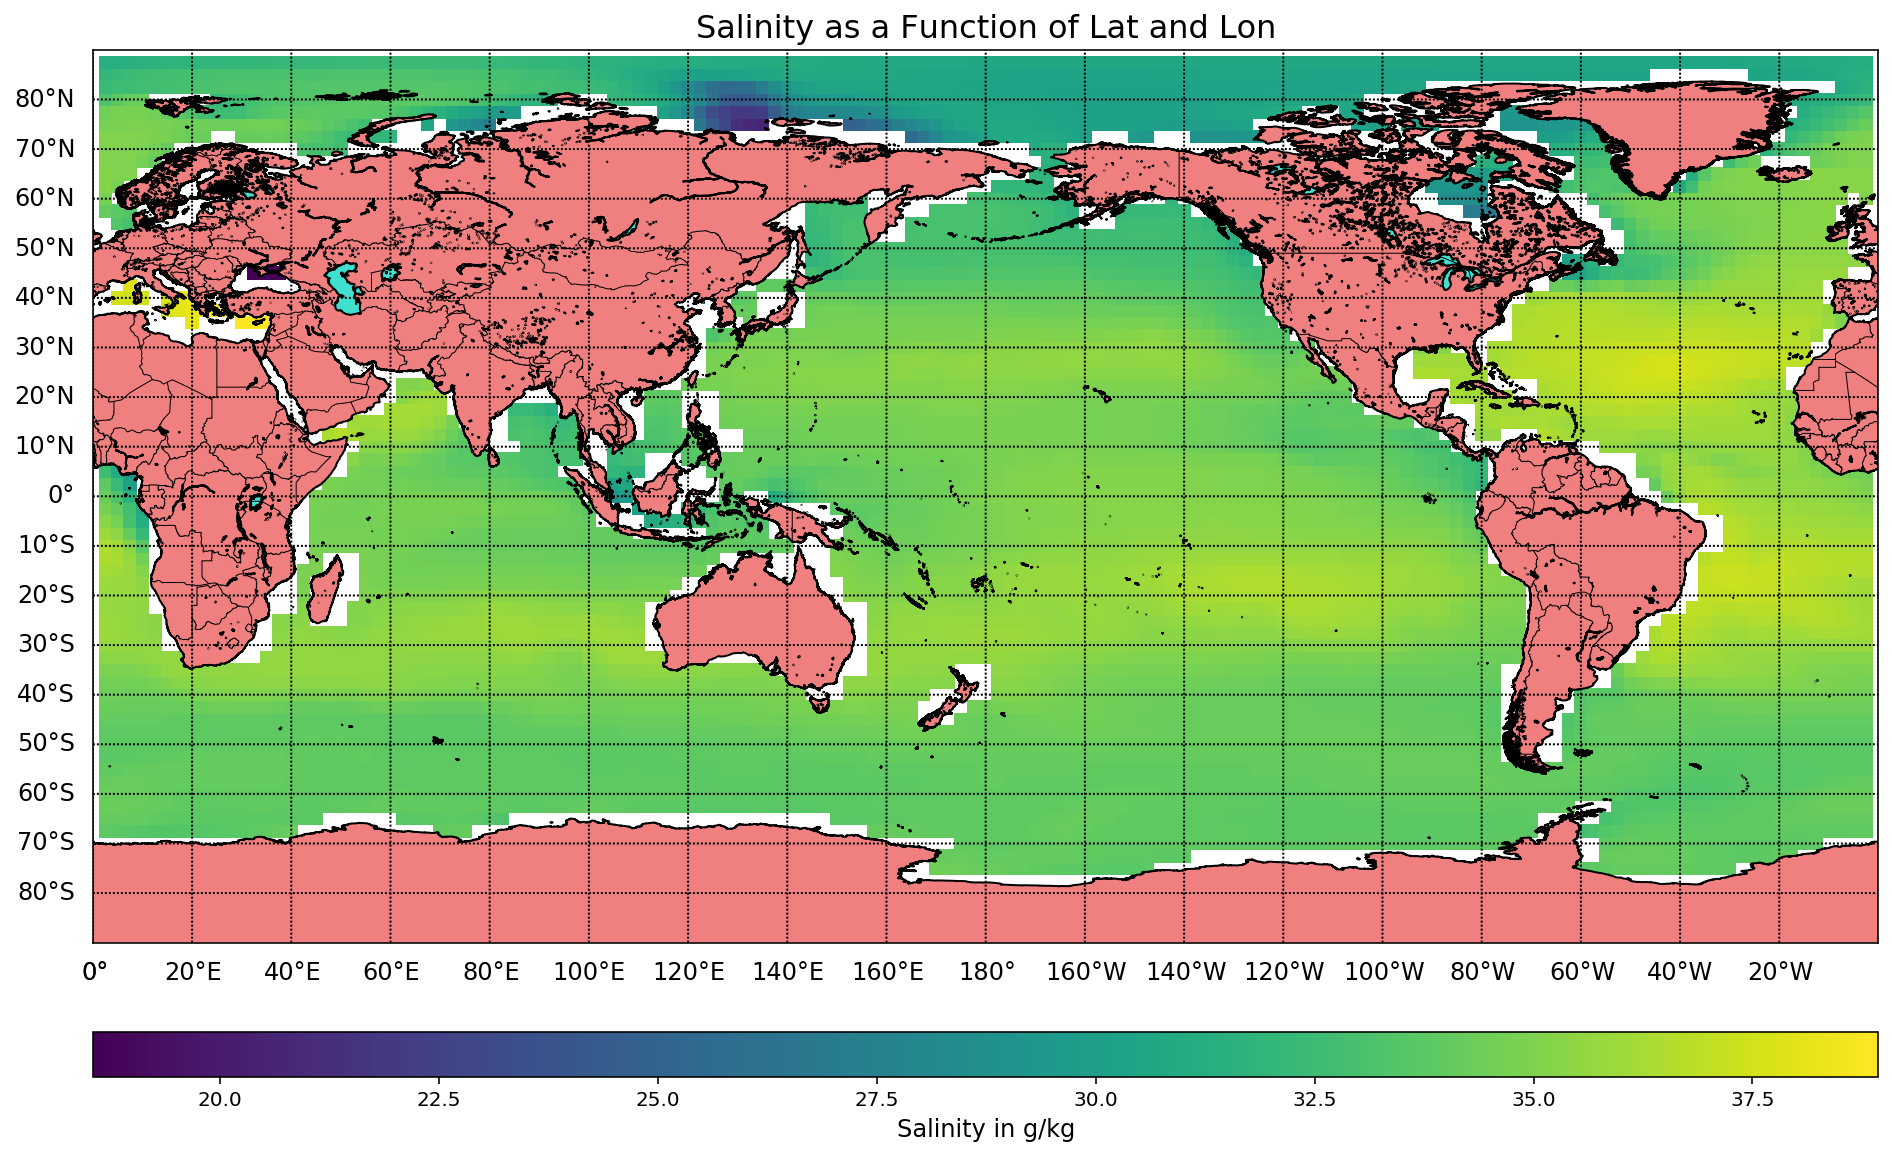

In [40]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format ='retina'  ### improved resolution for Mac retina screens! 

# Now to call the function defined above and commence plotting!
cyl_plot(sal_lon, sal_lat, so[0,0,:,:], "Salinity in g/kg", "Salinity as a Function of Lat and Lon")

This process can now be repeated for our sea_ice fraction dataset:

In [34]:
sic_lon, sic_lat = np.meshgrid(sic_lon[:], sic_lat[:])

print(sic_lon.shape)
print(sic_lat.shape)
print(sic[0,:,:].shape)

(72, 144)
(72, 144)
(72, 144)


/Users/leebardon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/Users/leebardon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


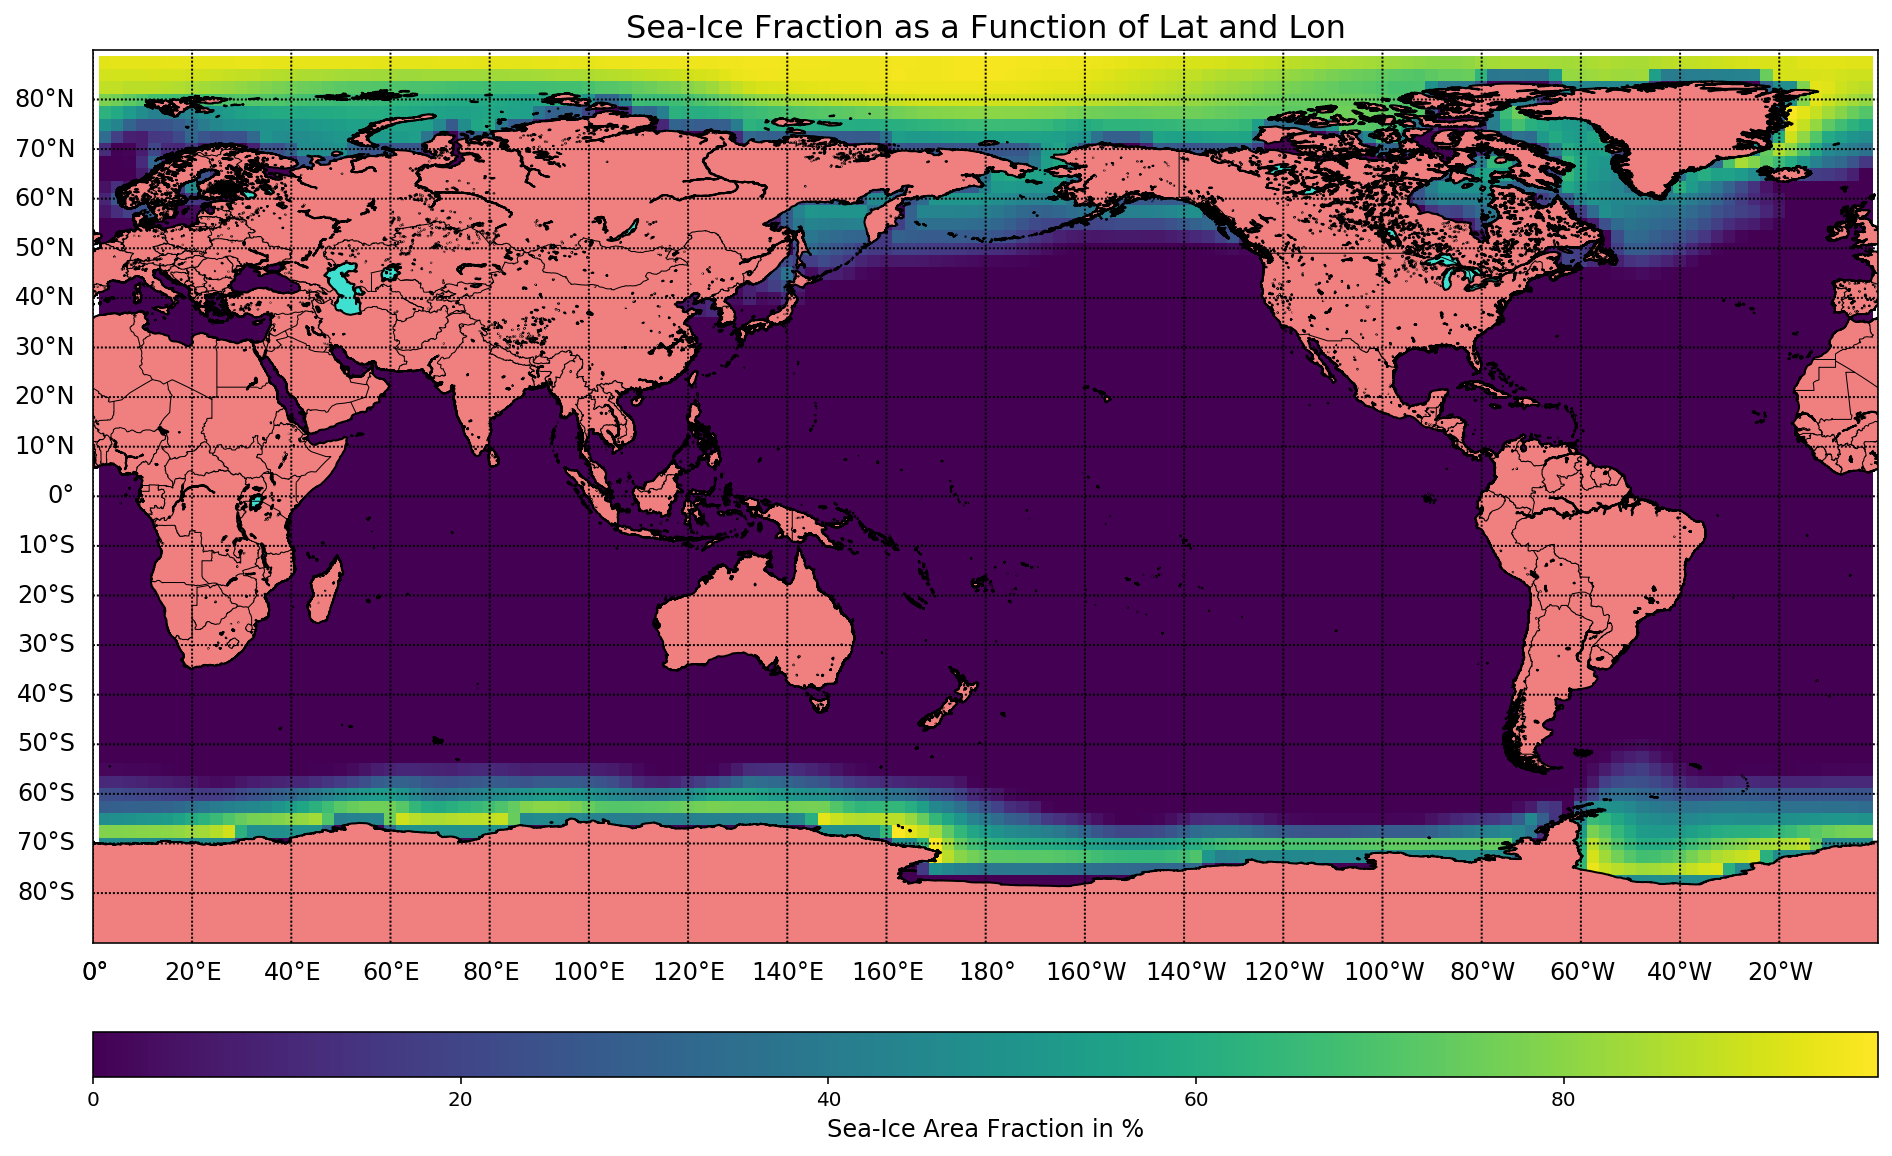

In [41]:
cyl_plot(sic_lon, sic_lat, sic[0,:,:], "Sea-Ice Area Fraction in %", "Sea-Ice Fraction as a Function of Lat and Lon")

<h2> BONUS </h2>

Some cool map projections that I happened upon. See https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html for more details, including how to plot data on top of these projections. 

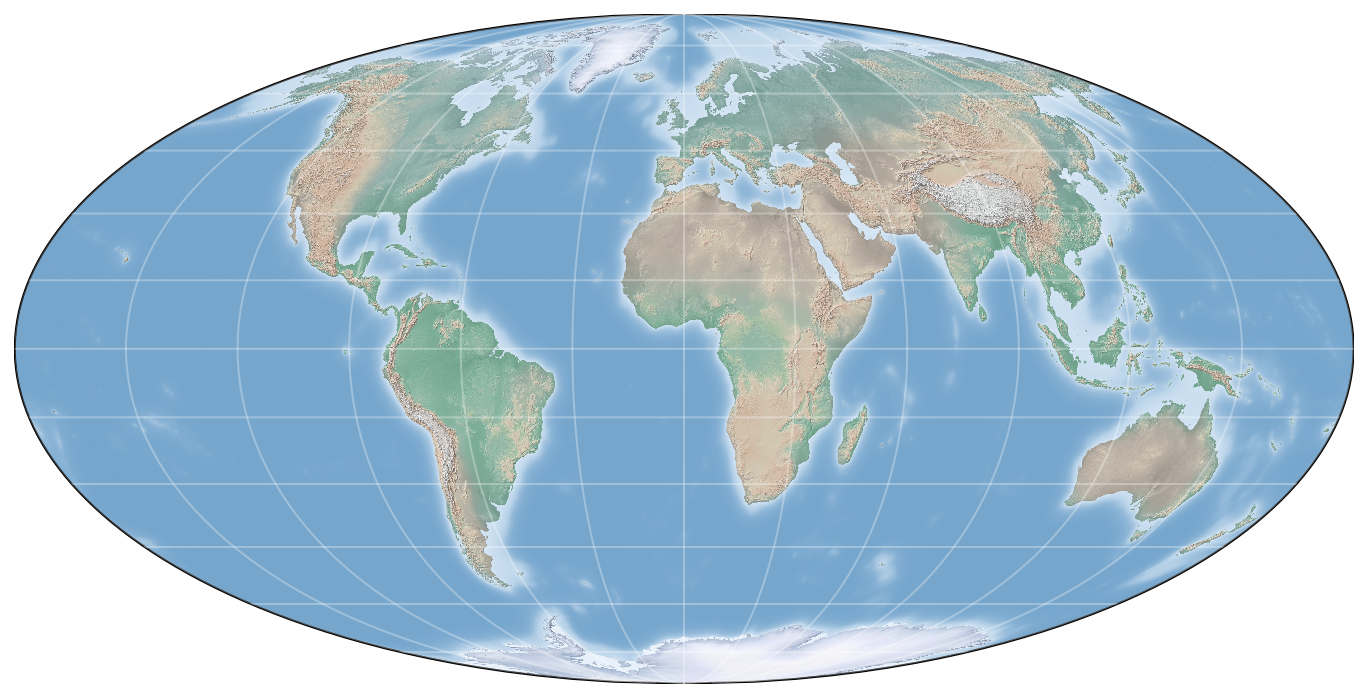

In [37]:
from itertools import chain

def draw_map(m, scale=0.5):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')
        

fig = plt.figure(figsize=(12, 10), edgecolor='w')
m = Basemap(projection='moll', resolution=None,
            lat_0=0, lon_0=0)
draw_map(m)

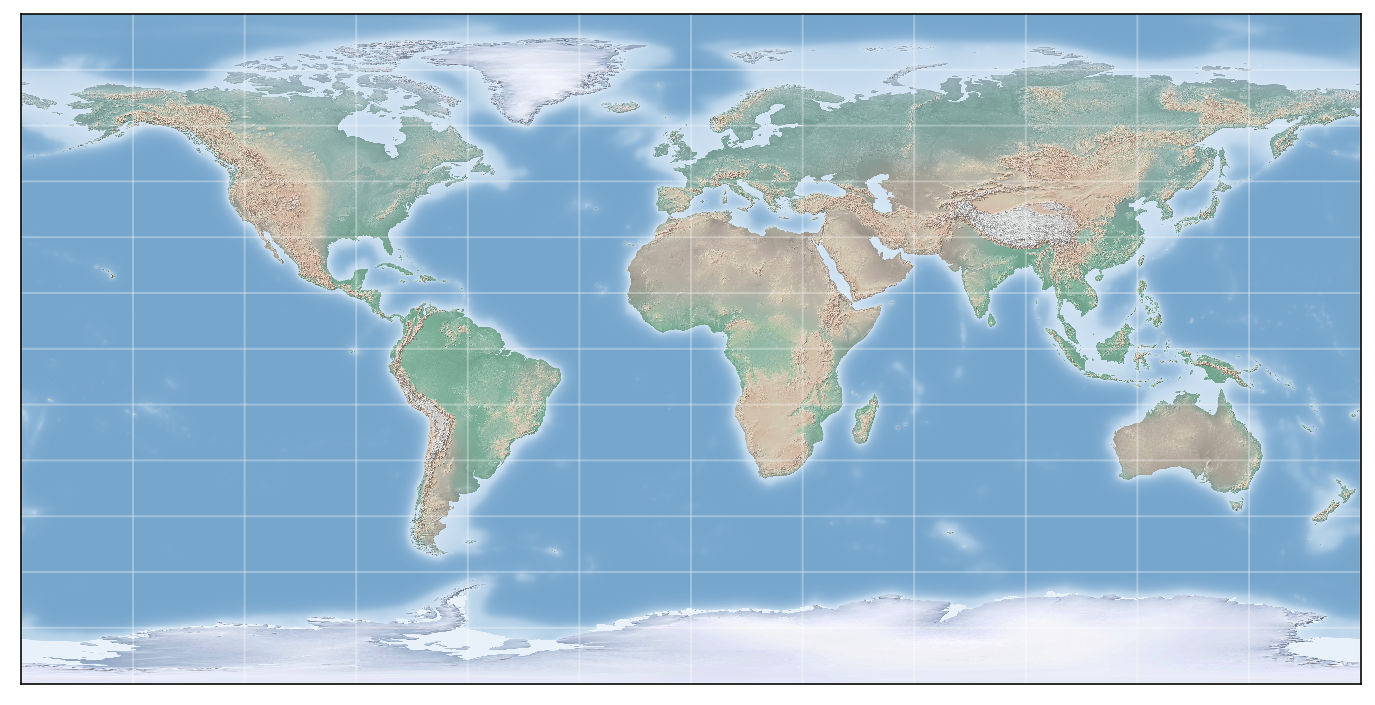

In [38]:
fig = plt.figure(figsize=(12, 10), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)